In [6]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(r"C:\Users\PC\Documents\CSV_DATASETS\animal_disease_dataset.csv")

In [8]:
df.head(10)

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
0,cow,3,103.1,depression,painless lumps,loss of appetite,pneumonia
1,buffalo,13,104.5,painless lumps,loss of appetite,depression,lumpy virus
2,sheep,1,100.5,depression,painless lumps,loss of appetite,lumpy virus
3,cow,14,100.3,loss of appetite,swelling in limb,crackling sound,blackleg
4,sheep,2,103.6,painless lumps,loss of appetite,depression,pneumonia
5,goat,10,101.2,loss of appetite,blisters on gums,difficulty walking,foot and mouth
6,sheep,6,103.3,loss of appetite,depression,painless lumps,lumpy virus
7,goat,6,101.7,difficulty walking,blisters on tongue,loss of appetite,foot and mouth
8,buffalo,9,102.5,depression,painless lumps,loss of appetite,lumpy virus
9,goat,3,102.7,lameness,blisters on mouth,loss of appetite,foot and mouth


In [9]:
df.shape

(43778, 7)

In [10]:
cow_count = df['Animal'].value_counts()['cow']
print(f"Total number of cows: {cow_count}")
buffalo_count = df['Animal'].value_counts()['buffalo']
print(f"Total number of buffalo: {buffalo_count}")
sheep_count = df['Animal'].value_counts()['sheep']
print(f"Total number of sheep: {sheep_count}")
goat_count = df['Animal'].value_counts()['goat']
print(f"Total number of goat: {goat_count}")


Total number of cows: 11254
Total number of buffalo: 11238
Total number of sheep: 10658
Total number of goat: 10628


In [11]:
# We focus on cows

In [12]:
cows_df = df[df['Animal'] == 'cow'].copy()

# Display information about the new DataFrame
print("Cows Dataset Information:")
print(f"Total number of cow entries: {len(cows_df)}")
print("\nFirst few rows of cows dataset:")
print(cows_df.head())

# Verify we only have cows
print("\nUnique animals in new DataFrame:")
print(cows_df['Animal'].unique())

Cows Dataset Information:
Total number of cow entries: 11254

First few rows of cows dataset:
   Animal  Age  Temperature            Symptom 1         Symptom 2  \
0     cow    3        103.1           depression    painless lumps   
3     cow   14        100.3     loss of appetite  swelling in limb   
11    cow   11        103.9           depression    painless lumps   
19    cow   14        102.7  shortness of breath            sweats   
20    cow    1        103.7           depression  loss of appetite   

           Symptom 3      Disease  
0   loss of appetite    pneumonia  
3    crackling sound     blackleg  
11  loss of appetite  lumpy virus  
19            chills      anthrax  
20    painless lumps  lumpy virus  

Unique animals in new DataFrame:
['cow']


In [13]:
cows_df.head(10)
cows_df.shape

(11254, 7)

In [14]:
# Melt the dataframe to convert to long format
long_df = pd.melt(cows_df, 
                  id_vars=['Animal', 'Disease'], 
                  value_vars=['Symptom 1', 'Symptom 2', 'Symptom 3'],
                  var_name='Symptom Type',
                  value_name='Symptom')

# Sort values for better readability
long_df = long_df.sort_values(['Animal', 'Symptom Type'])

# Display the first few rows
print("Reshaped Data (First few rows):")
print(long_df.head(15))

# Verify the structure
print("\nDataset Structure:")
print(long_df.info())

# Count unique combinations
print("\nNumber of unique symptom combinations:")
print(long_df.groupby(['Disease', 'Symptom Type', 'Symptom']).size().reset_index(name='count'))

Reshaped Data (First few rows):
   Animal         Disease Symptom Type                  Symptom
0     cow       pneumonia    Symptom 1               depression
1     cow        blackleg    Symptom 1         loss of appetite
2     cow     lumpy virus    Symptom 1               depression
3     cow         anthrax    Symptom 1      shortness of breath
4     cow     lumpy virus    Symptom 1               depression
5     cow     lumpy virus    Symptom 1           painless lumps
6     cow         anthrax    Symptom 1         chest discomfort
7     cow     lumpy virus    Symptom 1         loss of appetite
8     cow  foot and mouth    Symptom 1         loss of appetite
9     cow        blackleg    Symptom 1         swelling in limb
10    cow  foot and mouth    Symptom 1         blisters on gums
11    cow     lumpy virus    Symptom 1           painless lumps
12    cow         anthrax    Symptom 1  swelling in extremities
13    cow       pneumonia    Symptom 1         loss of appetite
14    co

In [15]:
long_df.shape


(33762, 4)

In [21]:
import networkx as nx

In [24]:
# Extract all unique symptoms
unique_symptoms = long_df['Symptom'].unique()

# Display the list of unique symptoms
print("List of Unique Symptoms:")
for i, symptom in enumerate(sorted(unique_symptoms), 1):
    print(f"{i}. {symptom}")

# Count frequency of each symptom
symptom_frequency = long_df['Symptom'].value_counts()
print("\nSymptom Frequencies:")
print(symptom_frequency)

# Basic statistics about symptoms
print(f"\nTotal number of unique symptoms: {len(unique_symptoms)}")
print(f"Most common symptom: {symptom_frequency.index[0]} ({symptom_frequency.values[0]} occurrences)")
print(f"Least common symptom: {symptom_frequency.index[-1]} ({symptom_frequency.values[-1]} occurrences)")

List of Unique Symptoms:
1. blisters on gums
2. blisters on hooves
3. blisters on mouth
4. blisters on tongue
5. chest discomfort
6. chills
7. crackling sound
8. depression
9. difficulty walking
10. fatigue
11. lameness
12. loss of appetite
13. painless lumps
14. shortness of breath
15. sores on gums
16. sores on hooves
17. sores on mouth
18. sores on tongue
19. sweats
20. swelling in abdomen
21. swelling in extremities
22. swelling in limb
23. swelling in muscle
24. swelling in neck

Symptom Frequencies:
Symptom
loss of appetite           7825
depression                 5357
painless lumps             3869
difficulty walking         1968
lameness                   1929
crackling sound            1519
fatigue                    1260
chest discomfort           1250
sweats                     1246
shortness of breath        1246
chills                     1140
swelling in muscle          748
swelling in limb            740
swelling in abdomen         436
swelling in extremities     413
s

In [25]:
from itertools import combinations

# Create an empty graph
G = nx.Graph()

# Add nodes with frequency attributes
for symptom, freq in symptom_frequency.items():
    G.add_node(symptom, frequency=freq)

# Add edges based on symptom co-occurrences
for animal_symptoms in long_df.groupby('Animal')['Symptom'].apply(list):
    for s1, s2 in combinations(animal_symptoms, 2):
        if G.has_edge(s1, s2):
            G[s1][s2]['weight'] += 1
        else:
            G.add_edge(s1, s2, weight=1)

# Print network metrics
print("Network Statistics:")
print(f"Number of nodes (symptoms): {G.number_of_nodes()}")
print(f"Number of edges (co-occurrences): {G.number_of_edges()}")
print(f"Average node degree: {sum(dict(G.degree()).values())/G.number_of_nodes():.2f}")
print(f"Network density: {nx.density(G):.3f}")

# Print strongest connections
edge_weights = nx.get_edge_attributes(G, 'weight')
sorted_edges = sorted(edge_weights.items(), key=lambda x: x[1], reverse=True)
print("\nTop 5 Strongest Symptom Connections:")
for (s1, s2), weight in sorted_edges[:5]:
    print(f"{s1} - {s2}: {weight} co-occurrences")
    

Network Statistics:
Number of nodes (symptoms): 24
Number of edges (co-occurrences): 300
Average node degree: 25.00
Network density: 1.087

Top 5 Strongest Symptom Connections:
loss of appetite - depression: 41918525 co-occurrences
loss of appetite - loss of appetite: 30611400 co-occurrences
loss of appetite - painless lumps: 30274925 co-occurrences
depression - painless lumps: 20726233 co-occurrences
loss of appetite - difficulty walking: 15399600 co-occurrences


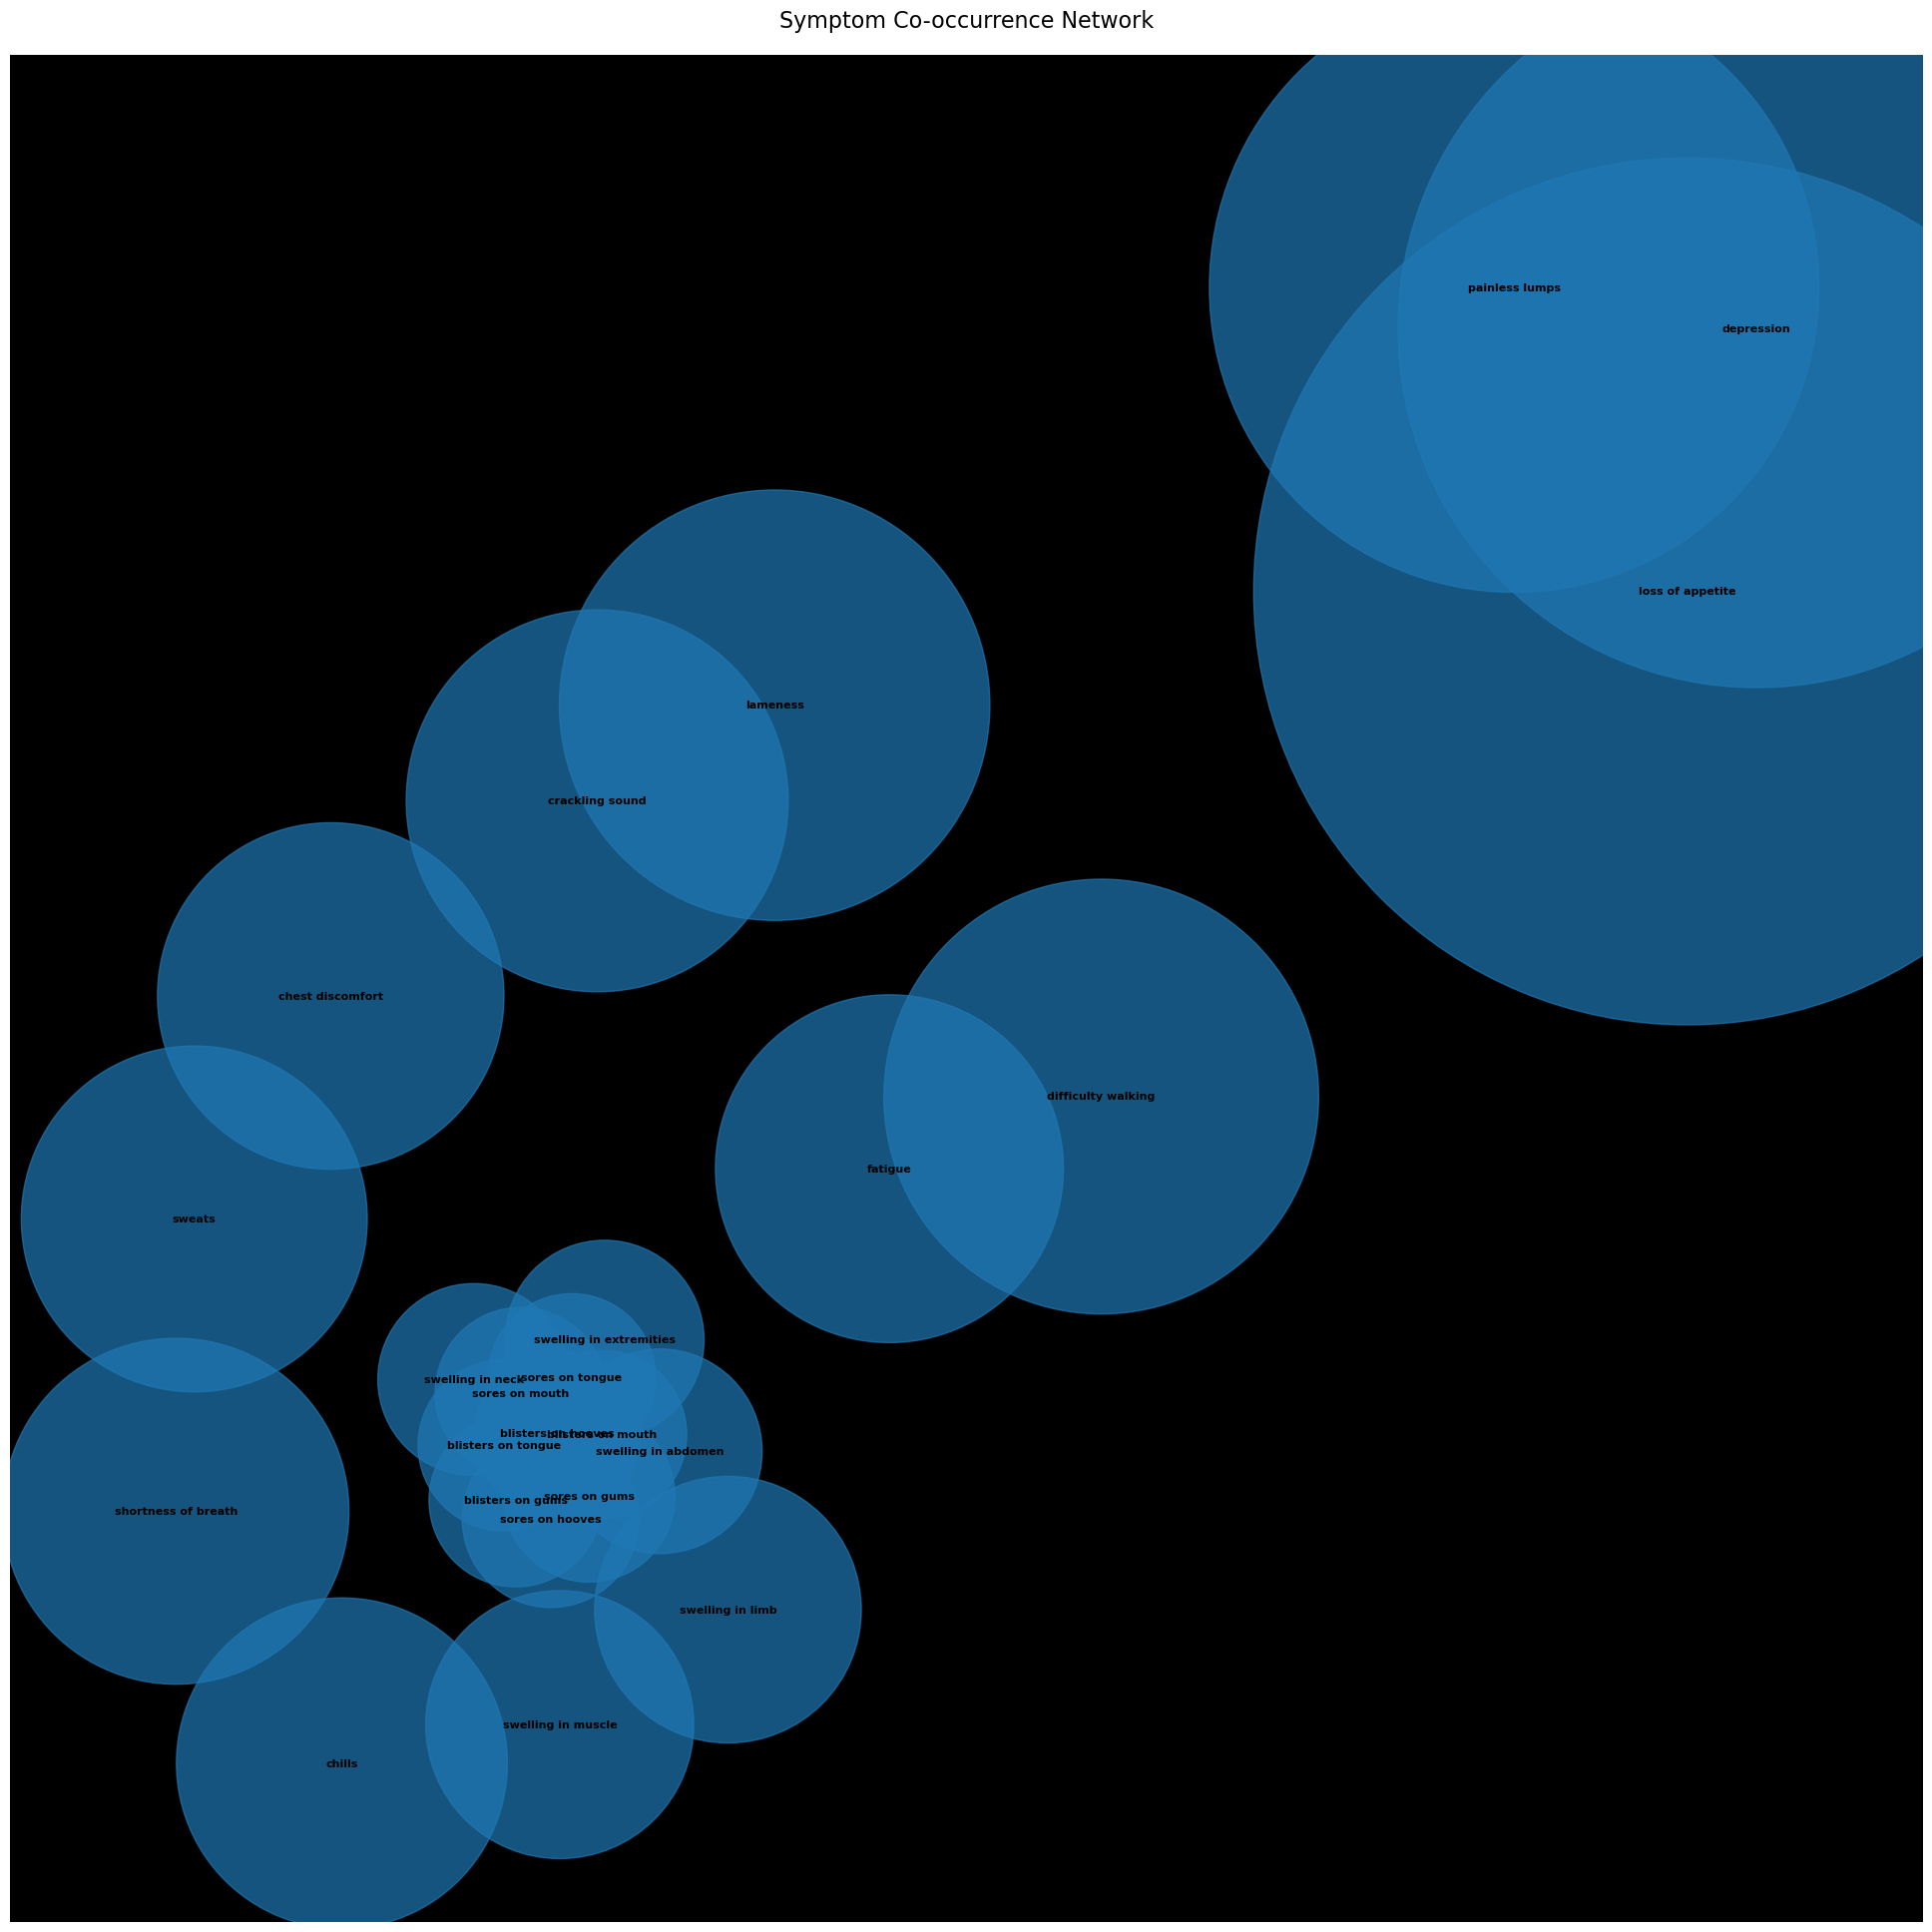

In [28]:
plt.figure(figsize=(20, 20))

# Use kamada_kawai_layout for optimal spacing
pos = nx.kamada_kawai_layout(G)

# Draw nodes with current sizes
node_sizes = [G.nodes[node]['frequency']*50 for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, alpha=0.7)

# Draw edges with current thickness
edge_weights = [G[u][v]['weight'] for u,v in G.edges()]
nx.draw_networkx_edges(G, pos, width=[w/200 for w in edge_weights], alpha=0.4)

# Add labels with increased font size
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

plt.title('Symptom Co-occurrence Network', fontsize=16, pad=20)
plt.axis('off')
plt.tight_layout(pad=3.0)
plt.show()